<a href="https://colab.research.google.com/github/TurkuNLP/intro-to-nlp/blob/master/nn_classifier_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the network learning?

* We can gain some intuition in what the network is learning
* Especially fruitful will turn out to look at the weights of the hidden layer



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import pickle
from keras.models import Model, model_from_json


def load_model(model_name):

    with open(model_name+".model.json", "rt") as f:
        model=model_from_json(f.read())
    model.load_weights(model_name+".weights.h5")
    
    with open(model_name+".encoders.pickle","rb") as f:
        label_encoder,vectorizer=pickle.load(f)
    
    return model,label_encoder,vectorizer

#Model saved to drive at the end of the nn_bow_classifier notebook!
model,label_encoder,vectorizer=load_model("/content/drive/MyDrive/intro-to-nlp/models-2022/imdb_bow")
print(model)

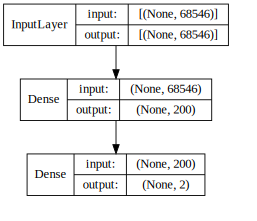

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=False,dpi=65).create(prog='dot', format='svg'))


* This is our model (watch out, Keras plots models from top to bottom)
* Hidden layer has N nodes with 74849 inputs each, one input for one word in the vocabulary
* We can also look at it the other way around: each word is assigned one weight for each hidden layer node
* So each word is seen by the network as a N-dimensional vector
* But what are these vectors? What properties should they have? Let us find out!

In [5]:
learned_weights=model.layers[1].get_weights()[0]
learned_weights.shape

(68546, 200)

* A good and easy way to explore the vectors is through their neighborhood
* This is easy to implement so let's try

In [6]:
import numpy

def nearest(word,learned_weights,vectorizer):
    inverse_vocab=dict((v,k) for k,v in vectorizer.vocabulary_.items())
    word_idx=vectorizer.vocabulary_[word]
    word_vector=learned_weights[word_idx]
    x=numpy.linalg.norm(word_vector-learned_weights,axis=-1)
    nearest=numpy.argsort(x)
    for idx in nearest[:30]:
        print(inverse_vocab[idx], end=", ")
    print()
    
nearest("bad",learned_weights,vectorizer)
nearest("terrible",learned_weights,vectorizer)

nearest("great",learned_weights,vectorizer)
nearest("enjoyable",learned_weights,vectorizer)


bad, horrible, uninspired, unconvincing, inexplicably, positive, insult, stunk, saxon, dangling, sadly, hoping, devoid, thinner, incoherent, boorish, stereotyped, components, mentions, soulless, horrid, unless, ilk, alleged, blah, wrestling, completist, signal, wrists, supposed, 
terrible, mst3k, lifeless, laughable, lousy, obnoxious, turkey, fails, lacks, stupidity, unwatchable, skip, unfunny, stinker, save, badly, mildly, junk, completists, dull, yawn, forwarding, pointless, baldwin, uwe, boredom, skate, orca, tripe, disappointing, 
great, noir, 07, funniest, perfectly, absorbing, enjoyed, excellently, fascinate, testimony, terrific, transcend, explores, liked, definitive, outstanding, connects, taut, swashbuckling, chong, advanced, defending, knockout, wonderful, chavez, mj, loved, baton, reveal, faceted, 
enjoyable, superb, pleasantly, enthralling, amazing, gem, natali, appreciated, delightfully, demme, favorite, captures, explores, perfect, wonderfully, escalates, philo, sublime, 